# Exaploratory Analysis for Green's Odyssey

I'm taking the csv from the dataframer step into a Pandas dataframe.

In [58]:
%matplotlib inline
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
pd.options.display.max_colwidth = 150 ###
import numpy as np
import re
import sys
import os
import matplotlib.pyplot as plt
# Add the directory containing visualization_utils.py to path
sys.path.append("/Users/debr/English-Homer/")
import visualization_utils as viz
import seaborn as sns
sns.set_style("whitegrid")
# palette astroblue   orange   genoa      carrot    tawny     neptune      SELAGO    mako   black
color = ['#003D59', '#FD6626','#177070','#FB871D','#641B5E','#86C3BC','#F5E1FD','#414A4F','k']
danB_plotstyle = {'figure.figsize': (12, 7), 
               'axes.labelsize': 'large', # fontsize for x and y labels (was large)
               'axes.titlesize': 'large', # fontsize for title
               'axes.titleweight': 'bold', # font type for title
               'xtick.labelsize': 'large', # fontsize for x 
               'ytick.labelsize':'small', # fontsize fory ticks
               'grid.color': 'k', # grid color
                'grid.linestyle': ':', # grid line style
                'grid.linewidth': 0.2, # grid line width
                'font.family': 'Times New Roman', # font family
                'grid.alpha': 0.5, # transparency of grid
               'figure.dpi': 300, # figure display resolution
               'savefig.bbox': 'tight', # tight bounding box
               'savefig.pad_inches': 0.4, # padding to use when saving
               'axes.titlepad': 15, # title padding
               'axes.labelpad': 8, # label padding
               'legend.borderpad': .6, # legend border padding
               'axes.prop_cycle': plt.cycler(
                color=color) # color cycle for plot lines
               }

# adjust matplotlib defaults
plt.rcParams.update(danB_plotstyle)

In [59]:
#csv to df
filepath = "/Users/debr/odysseys_en/Odyssey_dfs/Odyssey_Green_eda.csv"
df = pd.read_csv(filepath)
df.sample(2, random_state=42)

,author,year,title,book_num,text,num_lines,num_sentences,num_words
8,Green,2018,The Odyssey,9,"\nThen resourceful Odysseus responded to him, saying:\n“Alkinoos, lord, most distinguished among all peoples,\nit is indeed a good thing to listen...",572,189,5950
16,Green,2018,The Odyssey,17,"\nWhen Dawn appeared, early risen and rosy-fingered,\nTelemachos, dear son of godlike Odysseus, then\nfastened under his feet his fine sandals, pi...",610,260,6359


In [60]:
df.isna().sum()

author           0
year             0
title            0
book_num         0
text             0
num_lines        0
num_sentences    0
num_words        0
dtype: int64

In [61]:
df.describe()

,year,book_num,num_lines,num_sentences,num_words
count,24.0,24.000000,24.000000,24.000000,24.000000
mean,2018.0,12.500000,508.916667,176.083333,5286.166667
std,0.0,7.071068,112.378598,41.047074,1163.808055
min,2018.0,1.000000,333.000000,104.000000,3460.000000
25%,2018.0,6.750000,438.250000,150.000000,4602.250000
50%,2018.0,12.500000,498.000000,166.500000,5161.500000
75%,2018.0,18.250000,574.000000,204.250000,5965.000000
max,2018.0,24.000000,852.000000,268.000000,8864.000000


In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Scaled_num_words', 'Scaled_num_sentences', 'Scaled_num_lines']] = scaler.fit_transform(df[['num_words', 'num_sentences', 'num_lines']])

In [63]:
df

,author,year,title,book_num,text,num_lines,num_sentences,num_words,Scaled_num_words,Scaled_num_sentences,Scaled_num_lines
0,Green,2018,The Odyssey,1,"\nThe man, Muse—tell me about that resourceful man, who wandered\nfar and wide, when he’d sacked Troy’s sacred citadel:\nmany men’s townships he s...",448,150,4644,-0.563648,-0.649116,-0.553725
1,Green,2018,The Odyssey,2,"\nWhen Dawn appeared, early risen and rosy-fingered,\nOdysseus’ dear son got up from the bed he’d slept in,\nput on his clothes, slung a sharp swo...",436,150,4522,-0.670731,-0.649116,-0.662804
2,Green,2018,The Odyssey,3,"\nDeserting the deep’s enchanting surface, the sun rose up\ninto the brazen sky to bring light both to immortals\nand to mortal beings upon the gr...",499,163,5181,-0.092308,-0.325595,-0.090141
3,Green,2018,The Odyssey,4,\nNow they came to deep-hollowed Lakedaimon with its ravines\nand drove till they reached the domain of far-famed Menelaos.\nHim they found holdin...,852,268,8864,3.140367,2.287461,3.118586
4,Green,2018,The Odyssey,5,"\nAs Dawn arose from her bed beside illustrious Tithonos,\nto bring light to the immortals and to mortal mankind,\nthe gods were taking their seat...",497,144,5142,-0.126539,-0.798434,-0.108321
5,Green,2018,The Odyssey,6,"\nSo Odysseus slept on there, godlike and much-enduring,\nworn out by exhaustion and hardship; and meanwhile Athene\nwent off to the district and ...",333,112,3460,-1.602879,-1.594794,-1.599061
6,Green,2018,The Odyssey,7,"\nSo while Odysseus prayed there, godlike and much-enduring,\nthe strength of her two mules bore the girl back to town.\nWhen she arrived at her f...",351,104,3529,-1.542316,-1.793884,-1.435443
7,Green,2018,The Odyssey,8,"\nWhen Dawn appeared, early risen and rosy-fingered,\nAlkinoos, princely in power, arose from his slumber,\nand Odysseus, the Zeus-born sacker of ...",591,167,6011,0.636207,-0.226050,0.746128
8,Green,2018,The Odyssey,9,"\nThen resourceful Odysseus responded to him, saying:\n“Alkinoos, lord, most distinguished among all peoples,\nit is indeed a good thing to listen...",572,189,5950,0.582666,0.321447,0.573420
9,Green,2018,The Odyssey,10,"\n“To the isle of Aiolia then we came, where was the dwelling\nof Aiolos, Hippotas’ son, much loved by the deathless gods,\non a floating island: ...",580,218,6010,0.635329,1.043149,0.646139


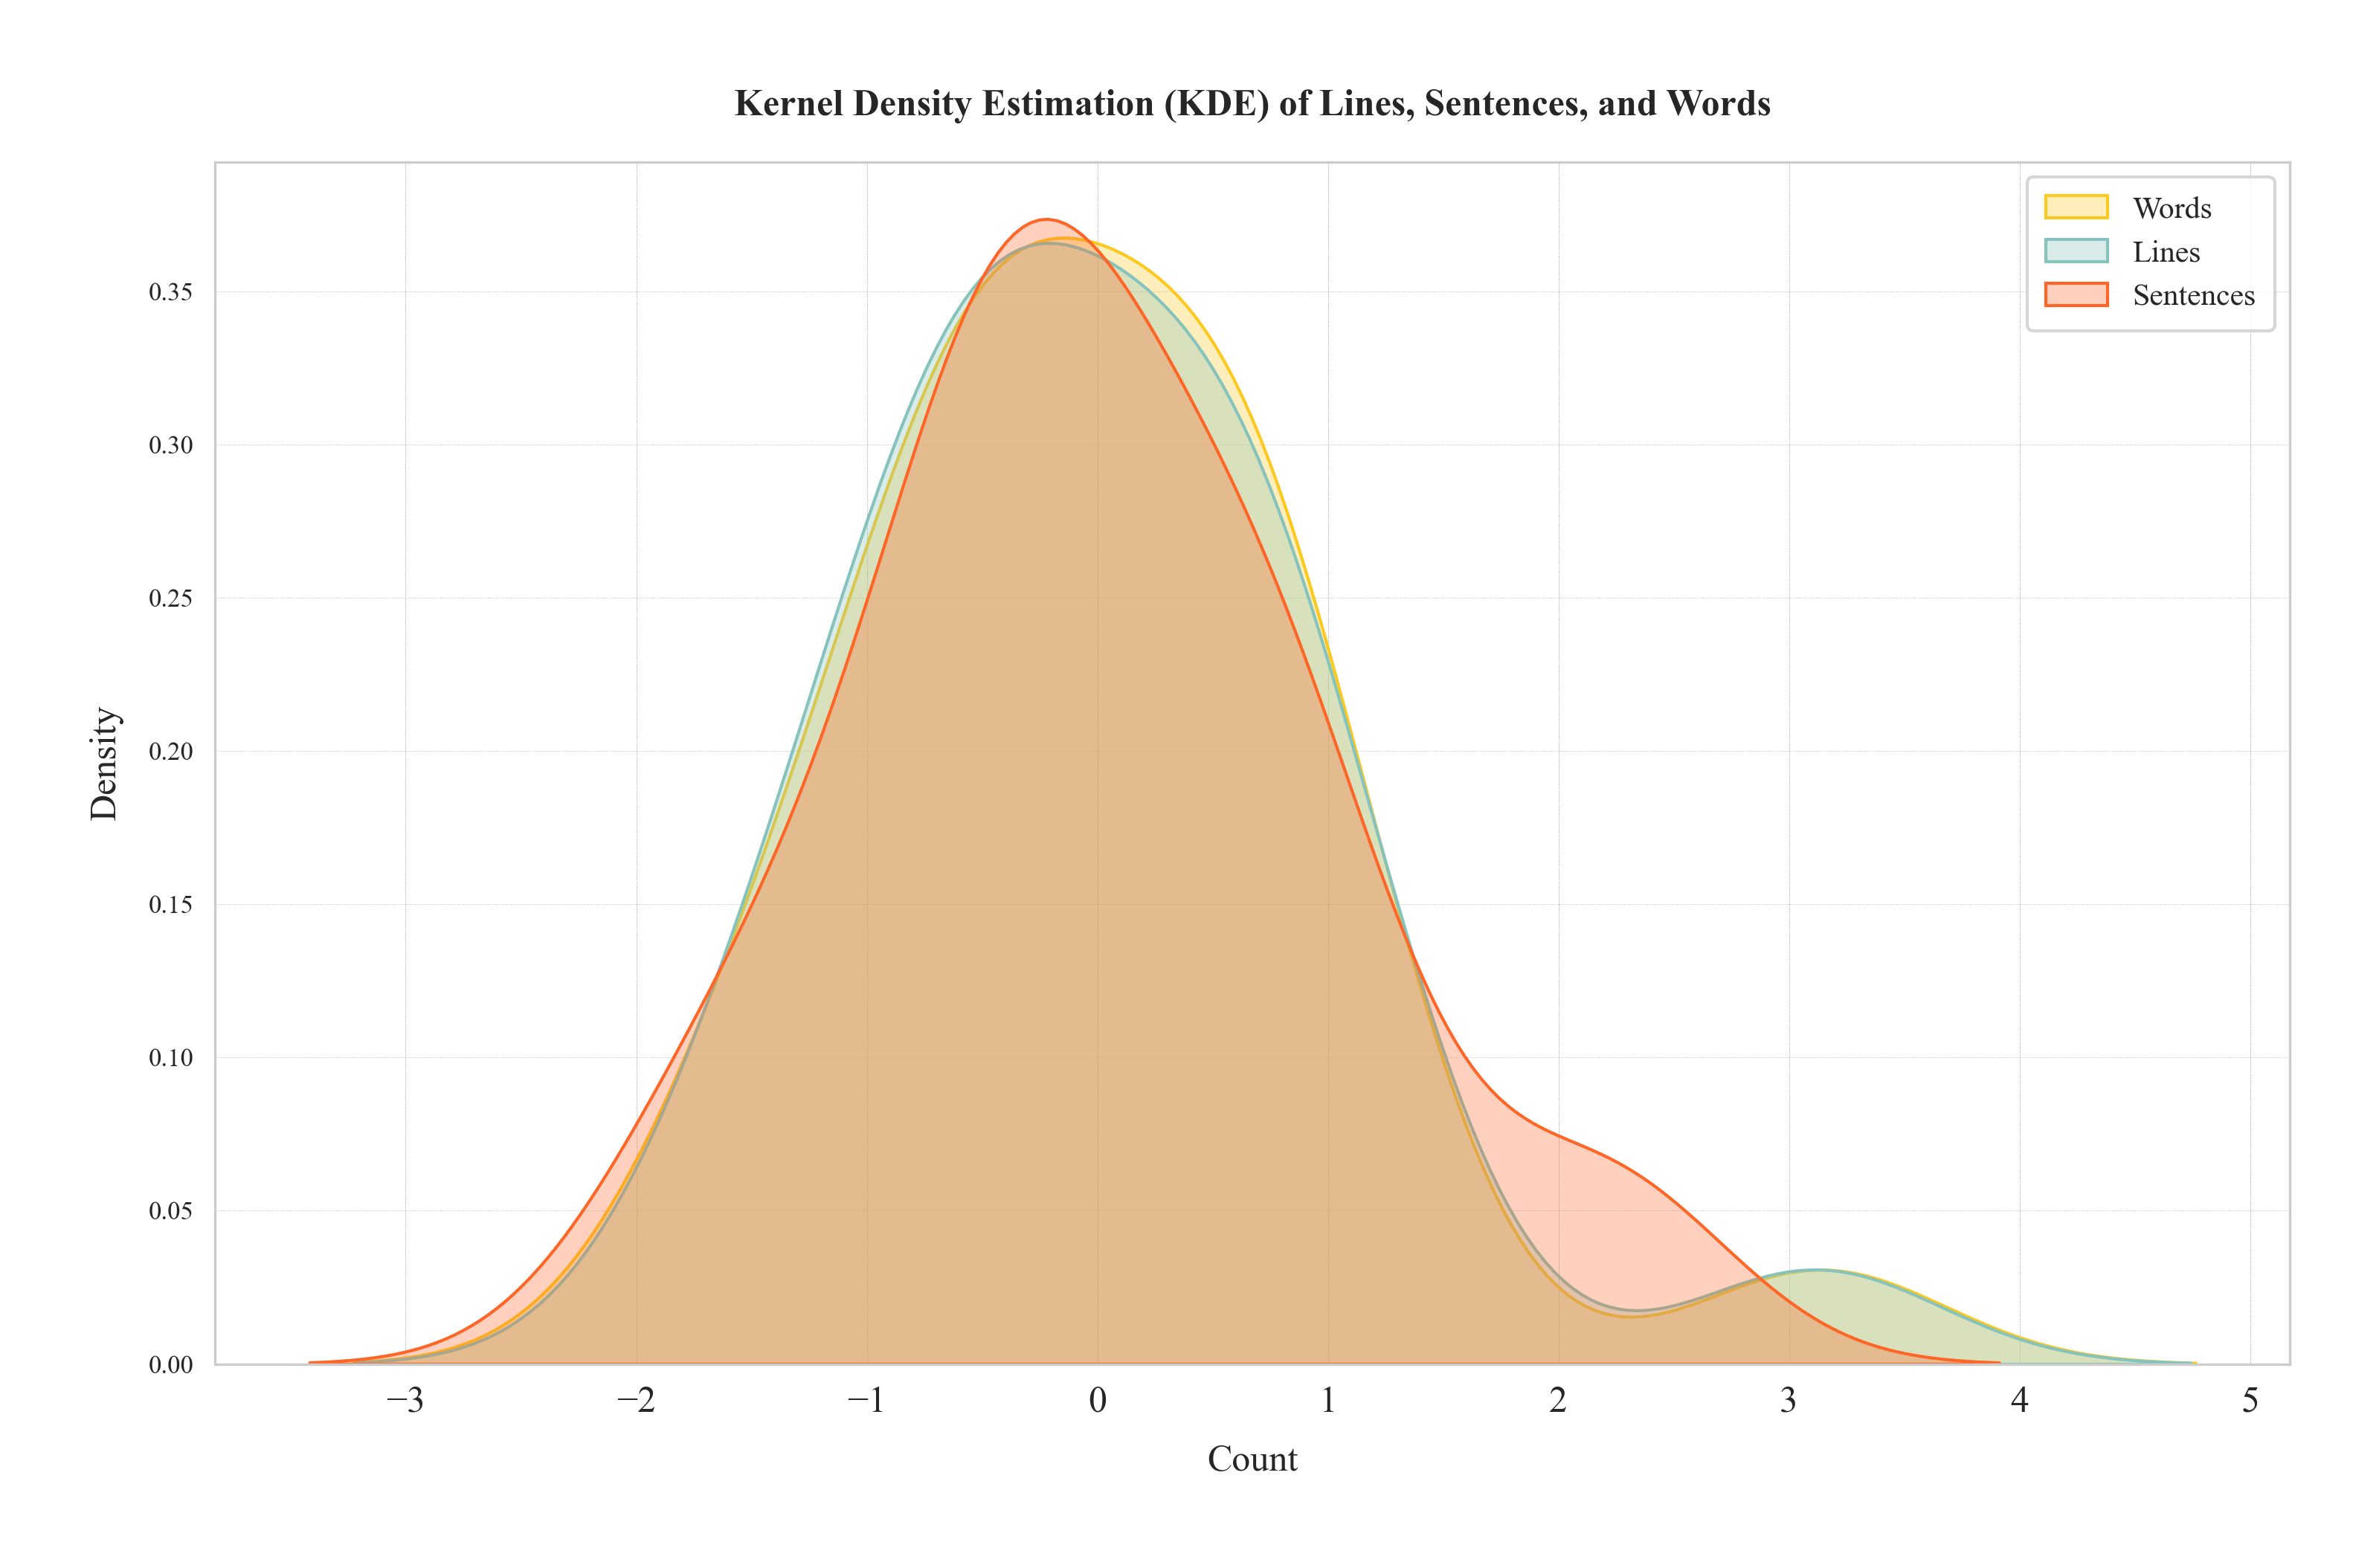

In [64]:
# KDE plot for Lines, Sentences, and Words
sns.kdeplot(df['Scaled_num_words'], label="Words", color= "#fcc921", fill=True, alpha=0.3)
sns.kdeplot(df['Scaled_num_lines'], label="Lines", color='#86C3BC', fill=True, alpha=0.3)
sns.kdeplot(df['Scaled_num_sentences'], label="Sentences", color='#FD6626',fill=True, alpha=0.3)

plt.xlabel("Count")
plt.ylabel("Density")
plt.title("Kernel Density Estimation (KDE) of Lines, Sentences, and Words")
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.show()

We can see that the frequency of lines and words is pretty much aligned throughout the books of the Odyssey, however, they skew to the right because of Book 4, which is longer and shows higher density. This pattern is less visible regarding sentences, meaning that Book 4 has a different style. This is to be expected because most of the Book's content: the encounter of Thelemacus and Pisistratus with Menelaus and Helen, because the language follows the protocol of a "state" visit and observes the ceremonial protocol of xenia, it is more formulaic and the sentences are longer than average narration. The regular measure of line (and to an extent words), is contrasted by the fluid measure of sentence length——which depends on stylistic features not on morphology and prosody (which is regular). 

In [65]:
df

,author,year,title,book_num,text,num_lines,num_sentences,num_words,Scaled_num_words,Scaled_num_sentences,Scaled_num_lines
0,Green,2018,The Odyssey,1,"\nThe man, Muse—tell me about that resourceful man, who wandered\nfar and wide, when he’d sacked Troy’s sacred citadel:\nmany men’s townships he s...",448,150,4644,-0.563648,-0.649116,-0.553725
1,Green,2018,The Odyssey,2,"\nWhen Dawn appeared, early risen and rosy-fingered,\nOdysseus’ dear son got up from the bed he’d slept in,\nput on his clothes, slung a sharp swo...",436,150,4522,-0.670731,-0.649116,-0.662804
2,Green,2018,The Odyssey,3,"\nDeserting the deep’s enchanting surface, the sun rose up\ninto the brazen sky to bring light both to immortals\nand to mortal beings upon the gr...",499,163,5181,-0.092308,-0.325595,-0.090141
3,Green,2018,The Odyssey,4,\nNow they came to deep-hollowed Lakedaimon with its ravines\nand drove till they reached the domain of far-famed Menelaos.\nHim they found holdin...,852,268,8864,3.140367,2.287461,3.118586
4,Green,2018,The Odyssey,5,"\nAs Dawn arose from her bed beside illustrious Tithonos,\nto bring light to the immortals and to mortal mankind,\nthe gods were taking their seat...",497,144,5142,-0.126539,-0.798434,-0.108321
5,Green,2018,The Odyssey,6,"\nSo Odysseus slept on there, godlike and much-enduring,\nworn out by exhaustion and hardship; and meanwhile Athene\nwent off to the district and ...",333,112,3460,-1.602879,-1.594794,-1.599061
6,Green,2018,The Odyssey,7,"\nSo while Odysseus prayed there, godlike and much-enduring,\nthe strength of her two mules bore the girl back to town.\nWhen she arrived at her f...",351,104,3529,-1.542316,-1.793884,-1.435443
7,Green,2018,The Odyssey,8,"\nWhen Dawn appeared, early risen and rosy-fingered,\nAlkinoos, princely in power, arose from his slumber,\nand Odysseus, the Zeus-born sacker of ...",591,167,6011,0.636207,-0.226050,0.746128
8,Green,2018,The Odyssey,9,"\nThen resourceful Odysseus responded to him, saying:\n“Alkinoos, lord, most distinguished among all peoples,\nit is indeed a good thing to listen...",572,189,5950,0.582666,0.321447,0.573420
9,Green,2018,The Odyssey,10,"\n“To the isle of Aiolia then we came, where was the dwelling\nof Aiolos, Hippotas’ son, much loved by the deathless gods,\non a floating island: ...",580,218,6010,0.635329,1.043149,0.646139


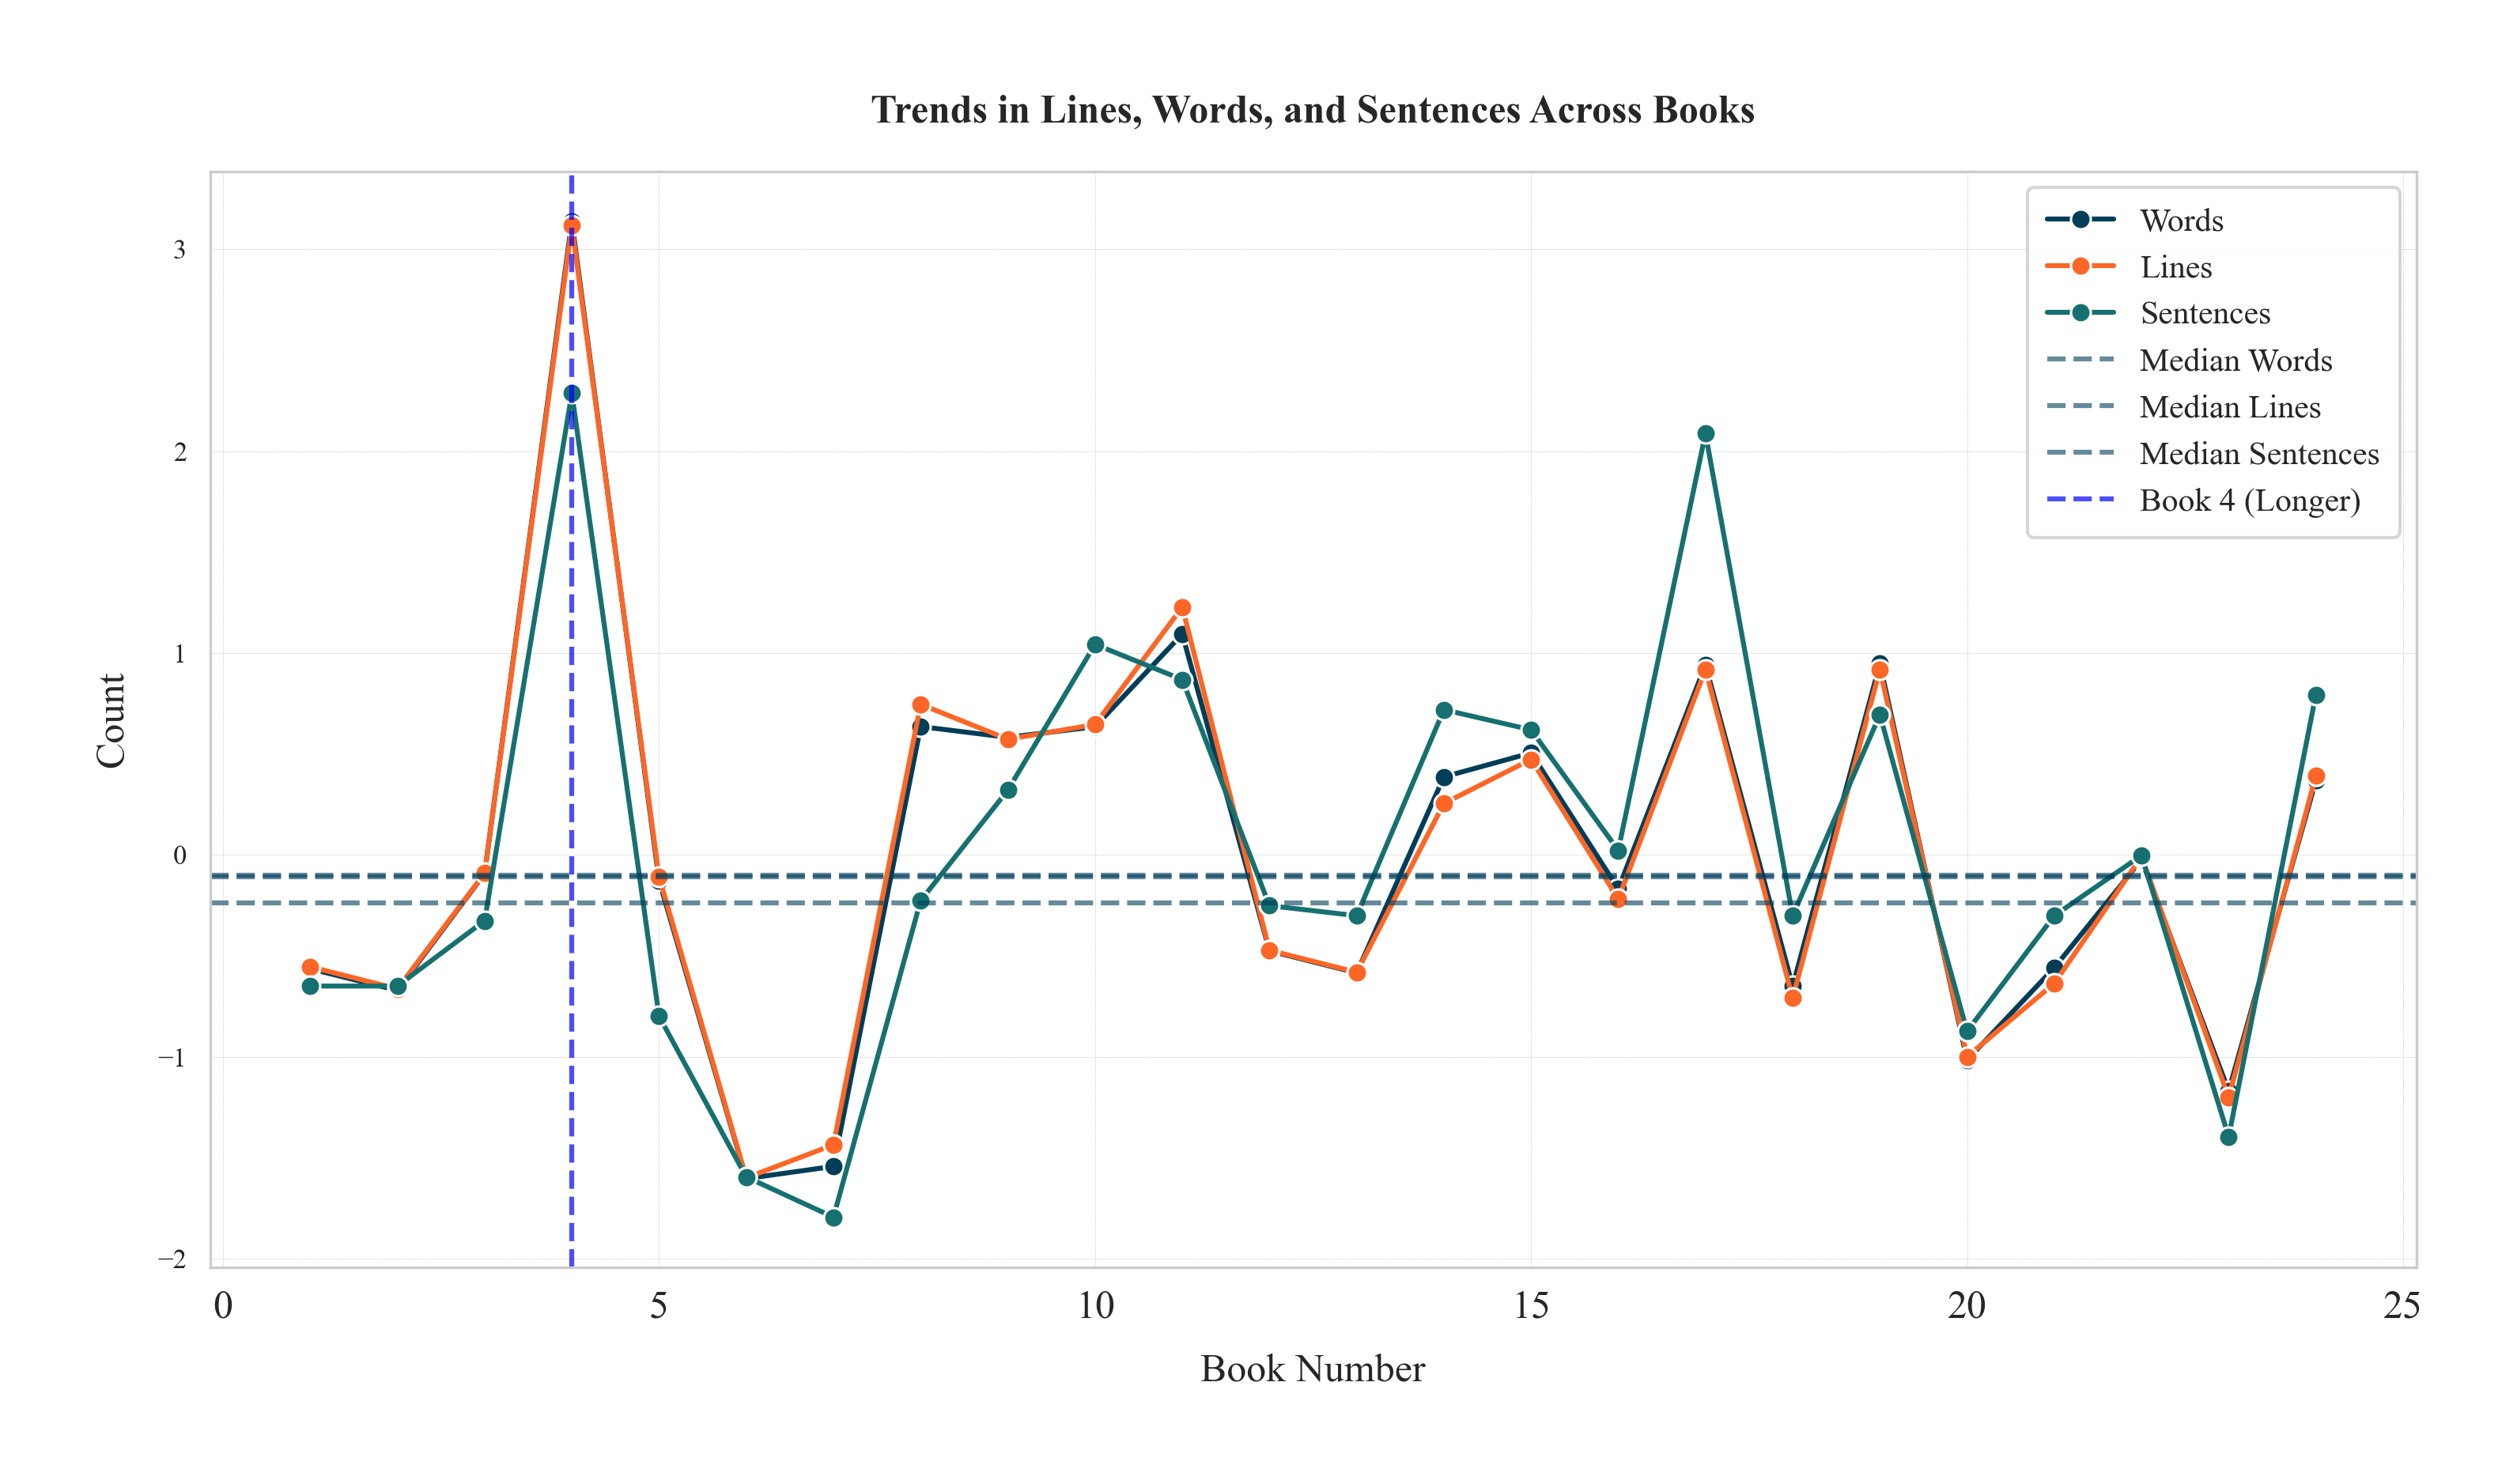

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Plot lines, words, and sentences across books
sns.lineplot(x=df["book_num"], y=df["Scaled_num_words"], label="Words", marker="o") #, color="#fcc921"
sns.lineplot(x=df["book_num"], y=df["Scaled_num_lines"], label="Lines", marker="o") #, color="#86C3BC"
sns.lineplot(x=df["book_num"], y=df["Scaled_num_sentences"], label="Sentences", marker="o") #, color="#FD6626"

# Compute medians
median_words = df["Scaled_num_words"].median()
median_lines = df["Scaled_num_lines"].median()
median_sentences = df["Scaled_num_sentences"].median()

# Add horizontal median lines
plt.axhline(y=median_words, linestyle="--", alpha=0.6, label="Median Words")
plt.axhline(y=median_lines, linestyle="--", alpha=0.6, label="Median Lines")
plt.axhline(y=median_sentences, linestyle="--", alpha=0.6, label="Median Sentences")

# Highlight Book 4
plt.axvline(x=4, color='blue', linestyle='--', alpha=0.7, label="Book 4 (Longer)")

# Labels and legend
plt.xlabel("Book Number")
plt.ylabel("Count")
plt.title("Trends in Lines, Words, and Sentences Across Books")
plt.legend()
plt.grid(alpha=0.3)

plt.show()

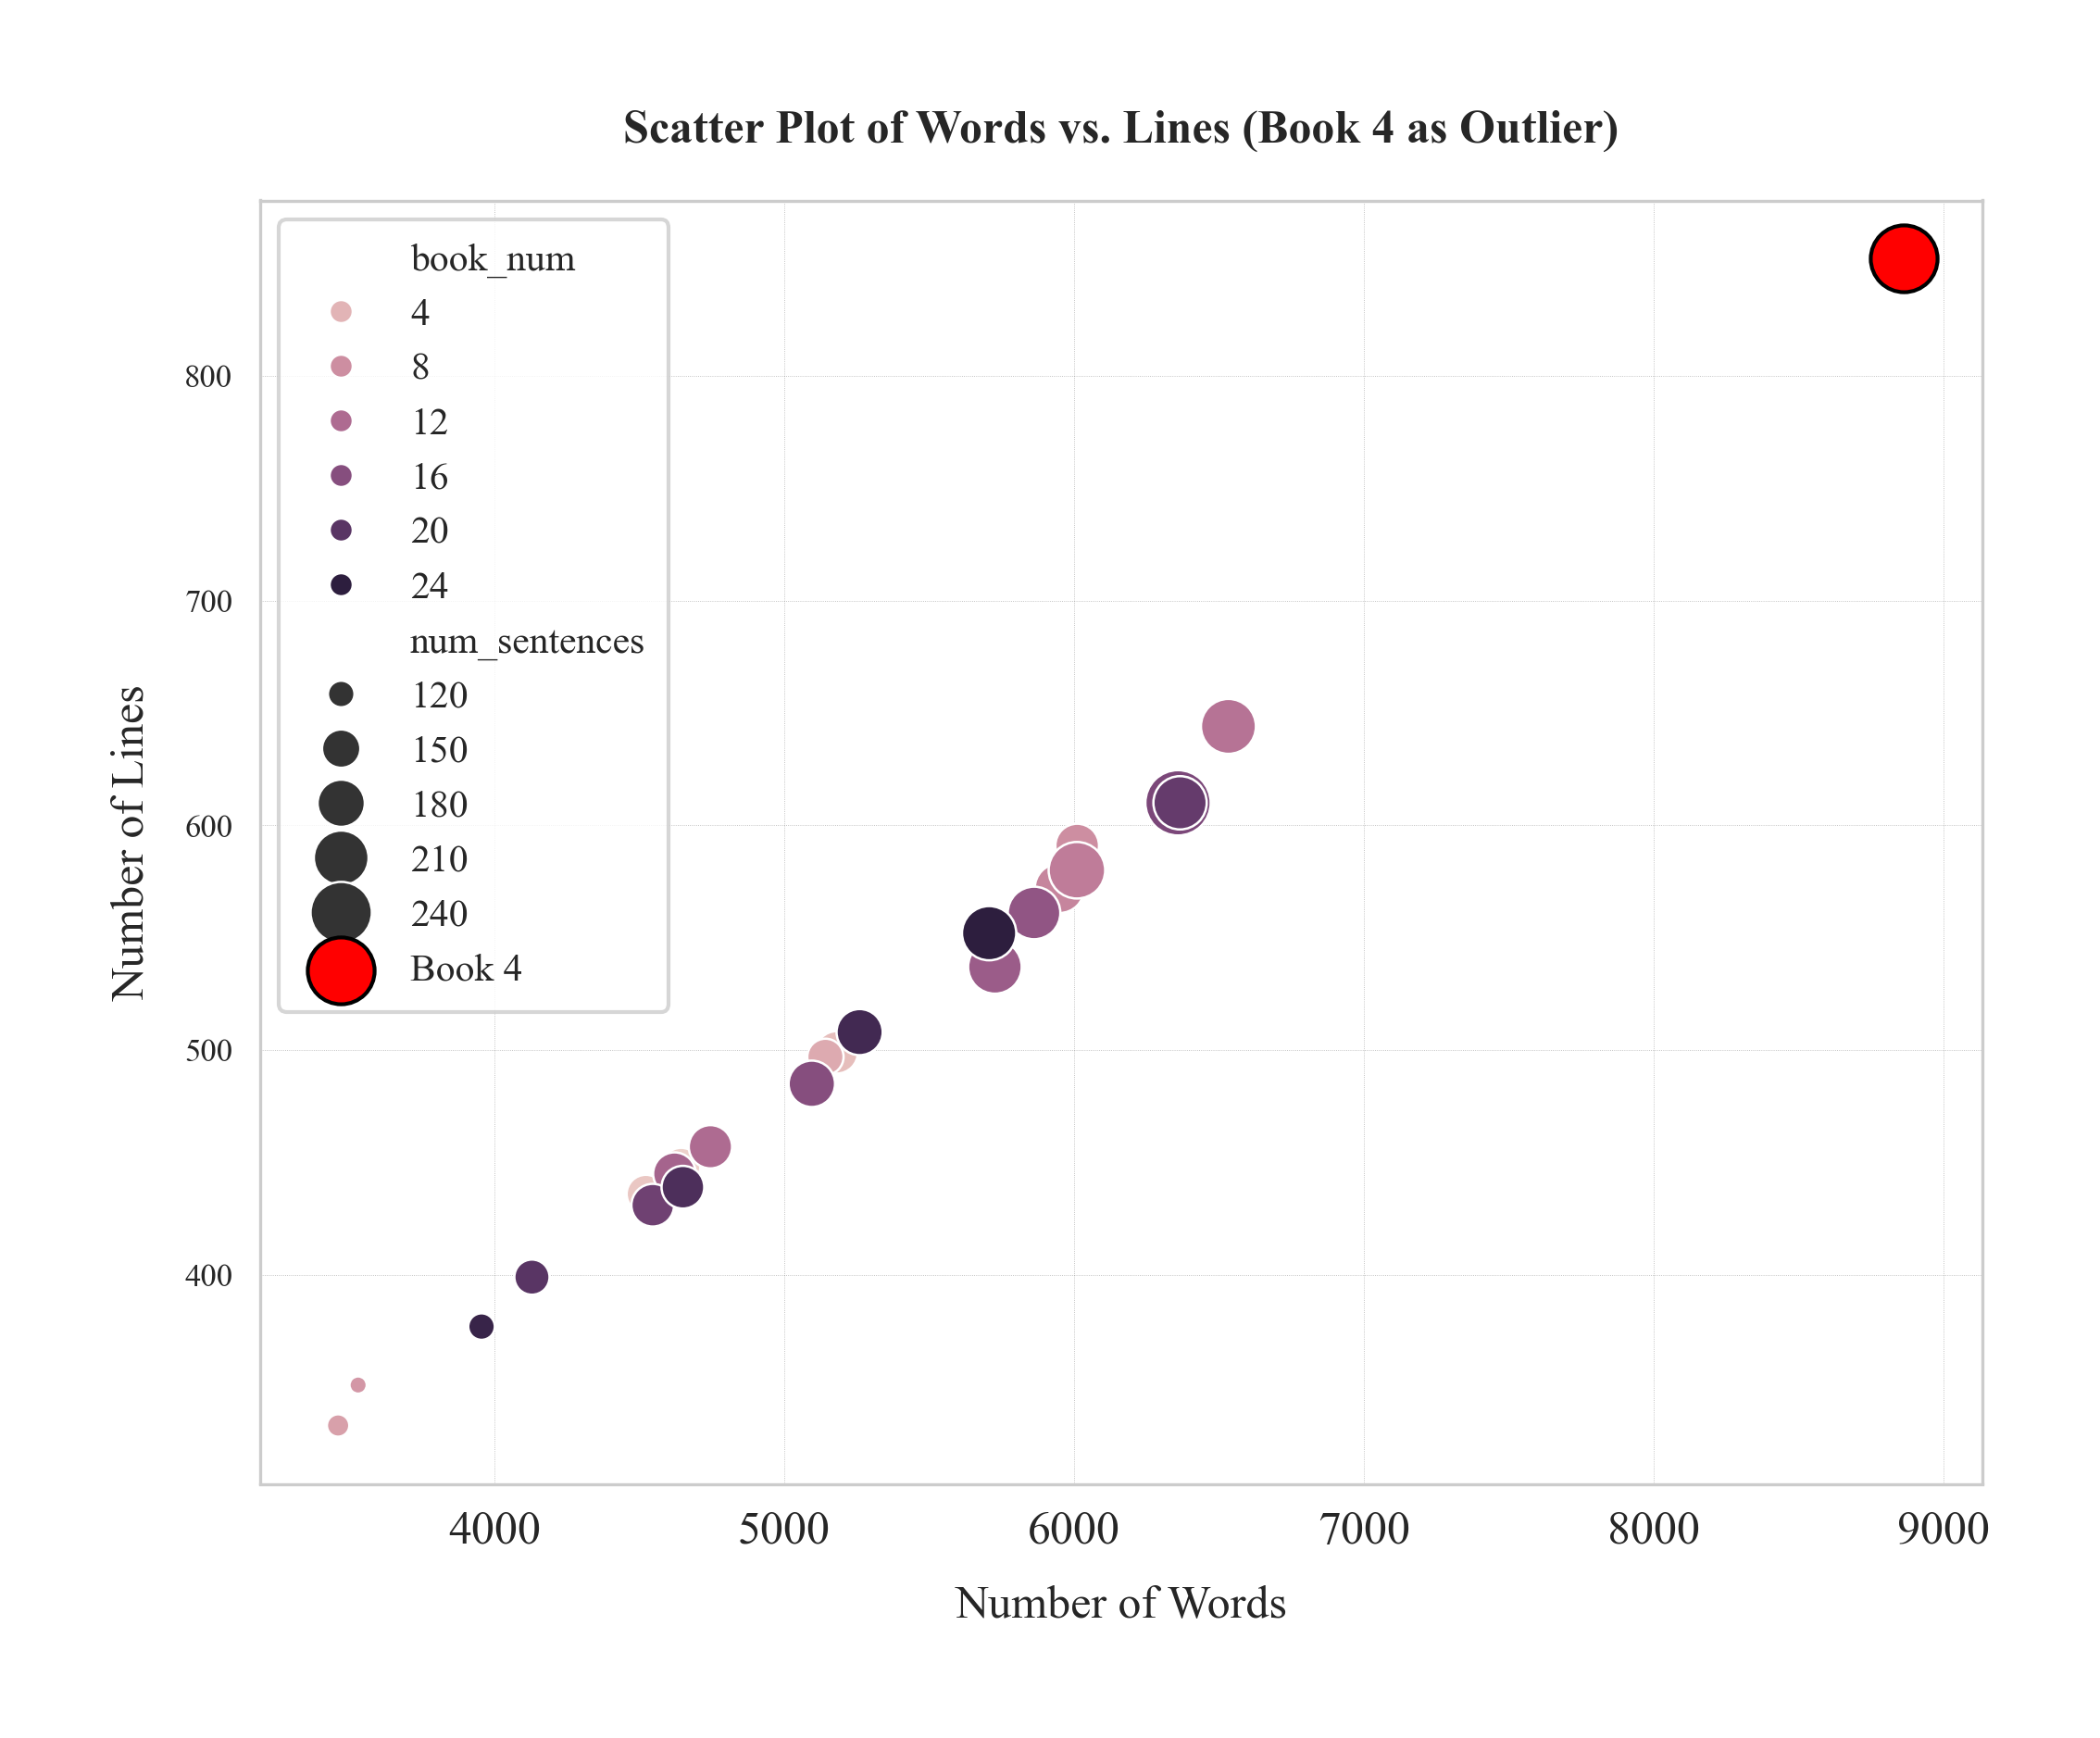

In [67]:
plt.figure(figsize=(8,6))

sns.scatterplot(data=df, x="num_words", y="num_lines", hue="book_num", size="num_sentences", sizes=(20, 300))

# Highlight Book 4
plt.scatter(df[df["book_num"] == 4]["num_words"], df[df["book_num"] == 4]["num_lines"], color="red", s=300, label="Book 4", edgecolors="black")

plt.xlabel("Number of Words")
plt.ylabel("Number of Lines")
plt.title("Scatter Plot of Words vs. Lines (Book 4 as Outlier)")
plt.legend()
plt.grid(alpha=0.3)

plt.show()

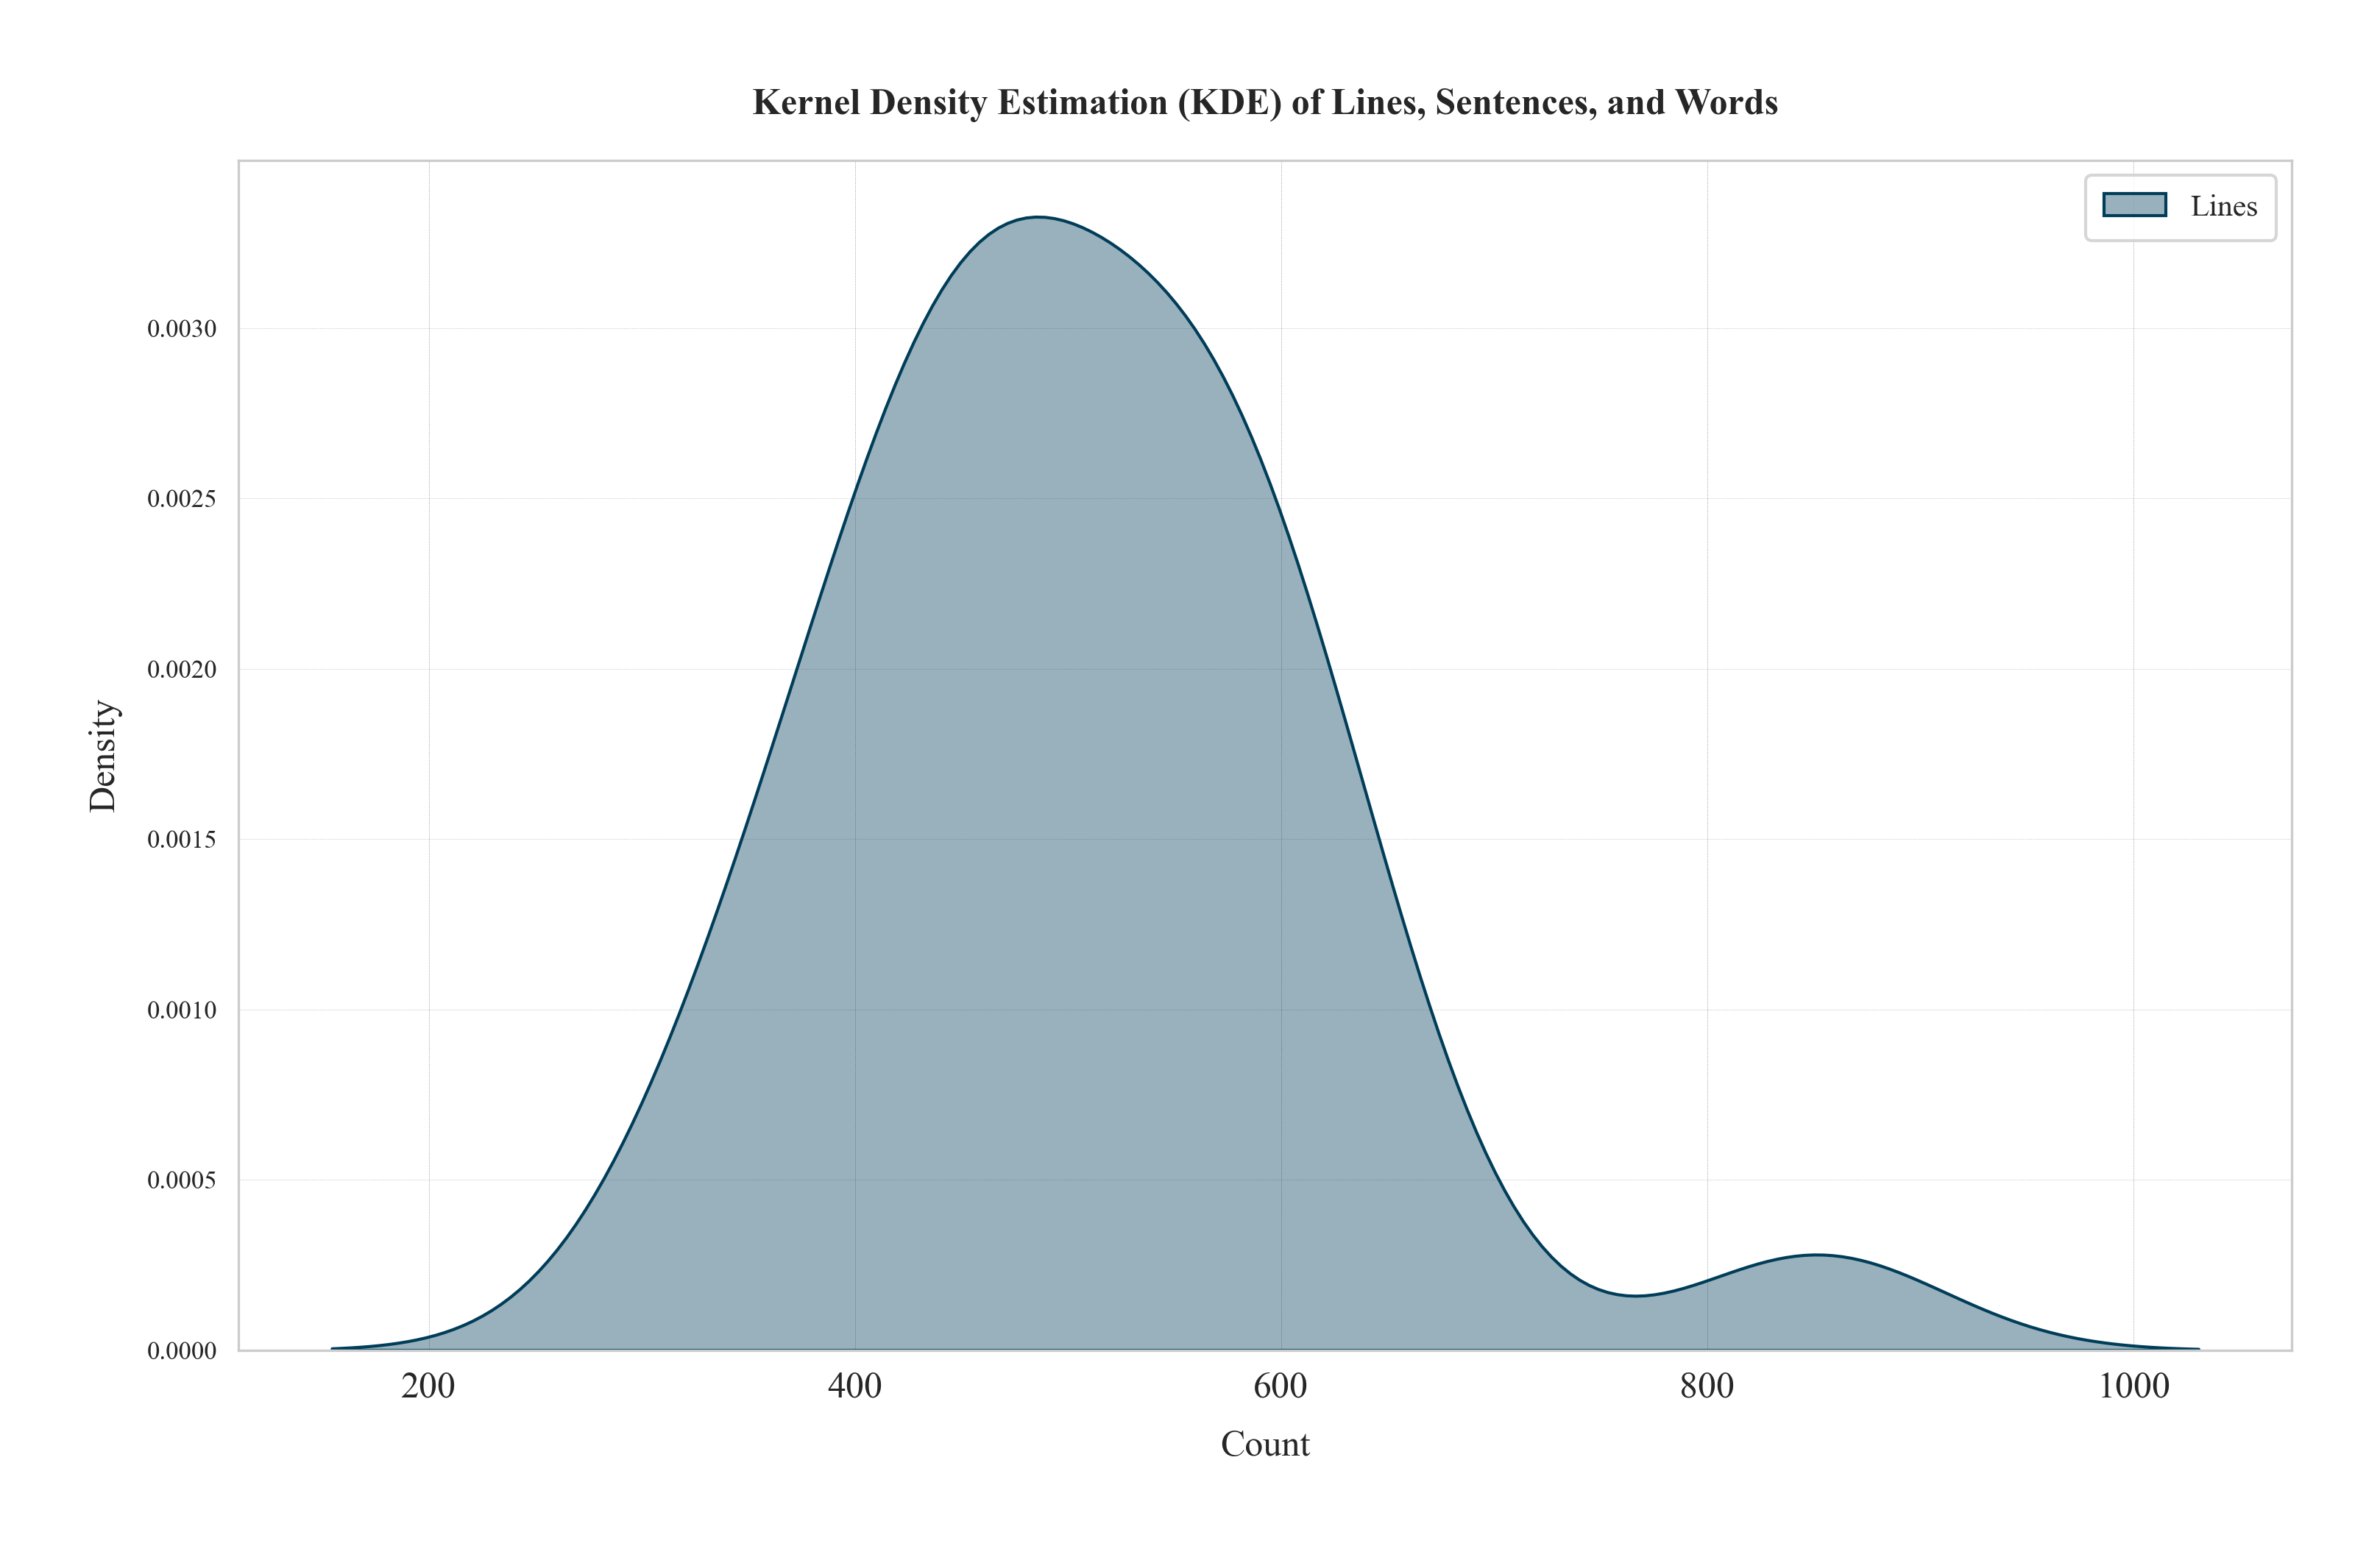

In [13]:
# Words KDE plot

sns.kdeplot(df['num_lines'], label="Lines", fill=True, alpha=0.4)


plt.xlabel("Count")
plt.ylabel("Density")
plt.title("Kernel Density Estimation (KDE) of Lines, Sentences, and Words")
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.show()

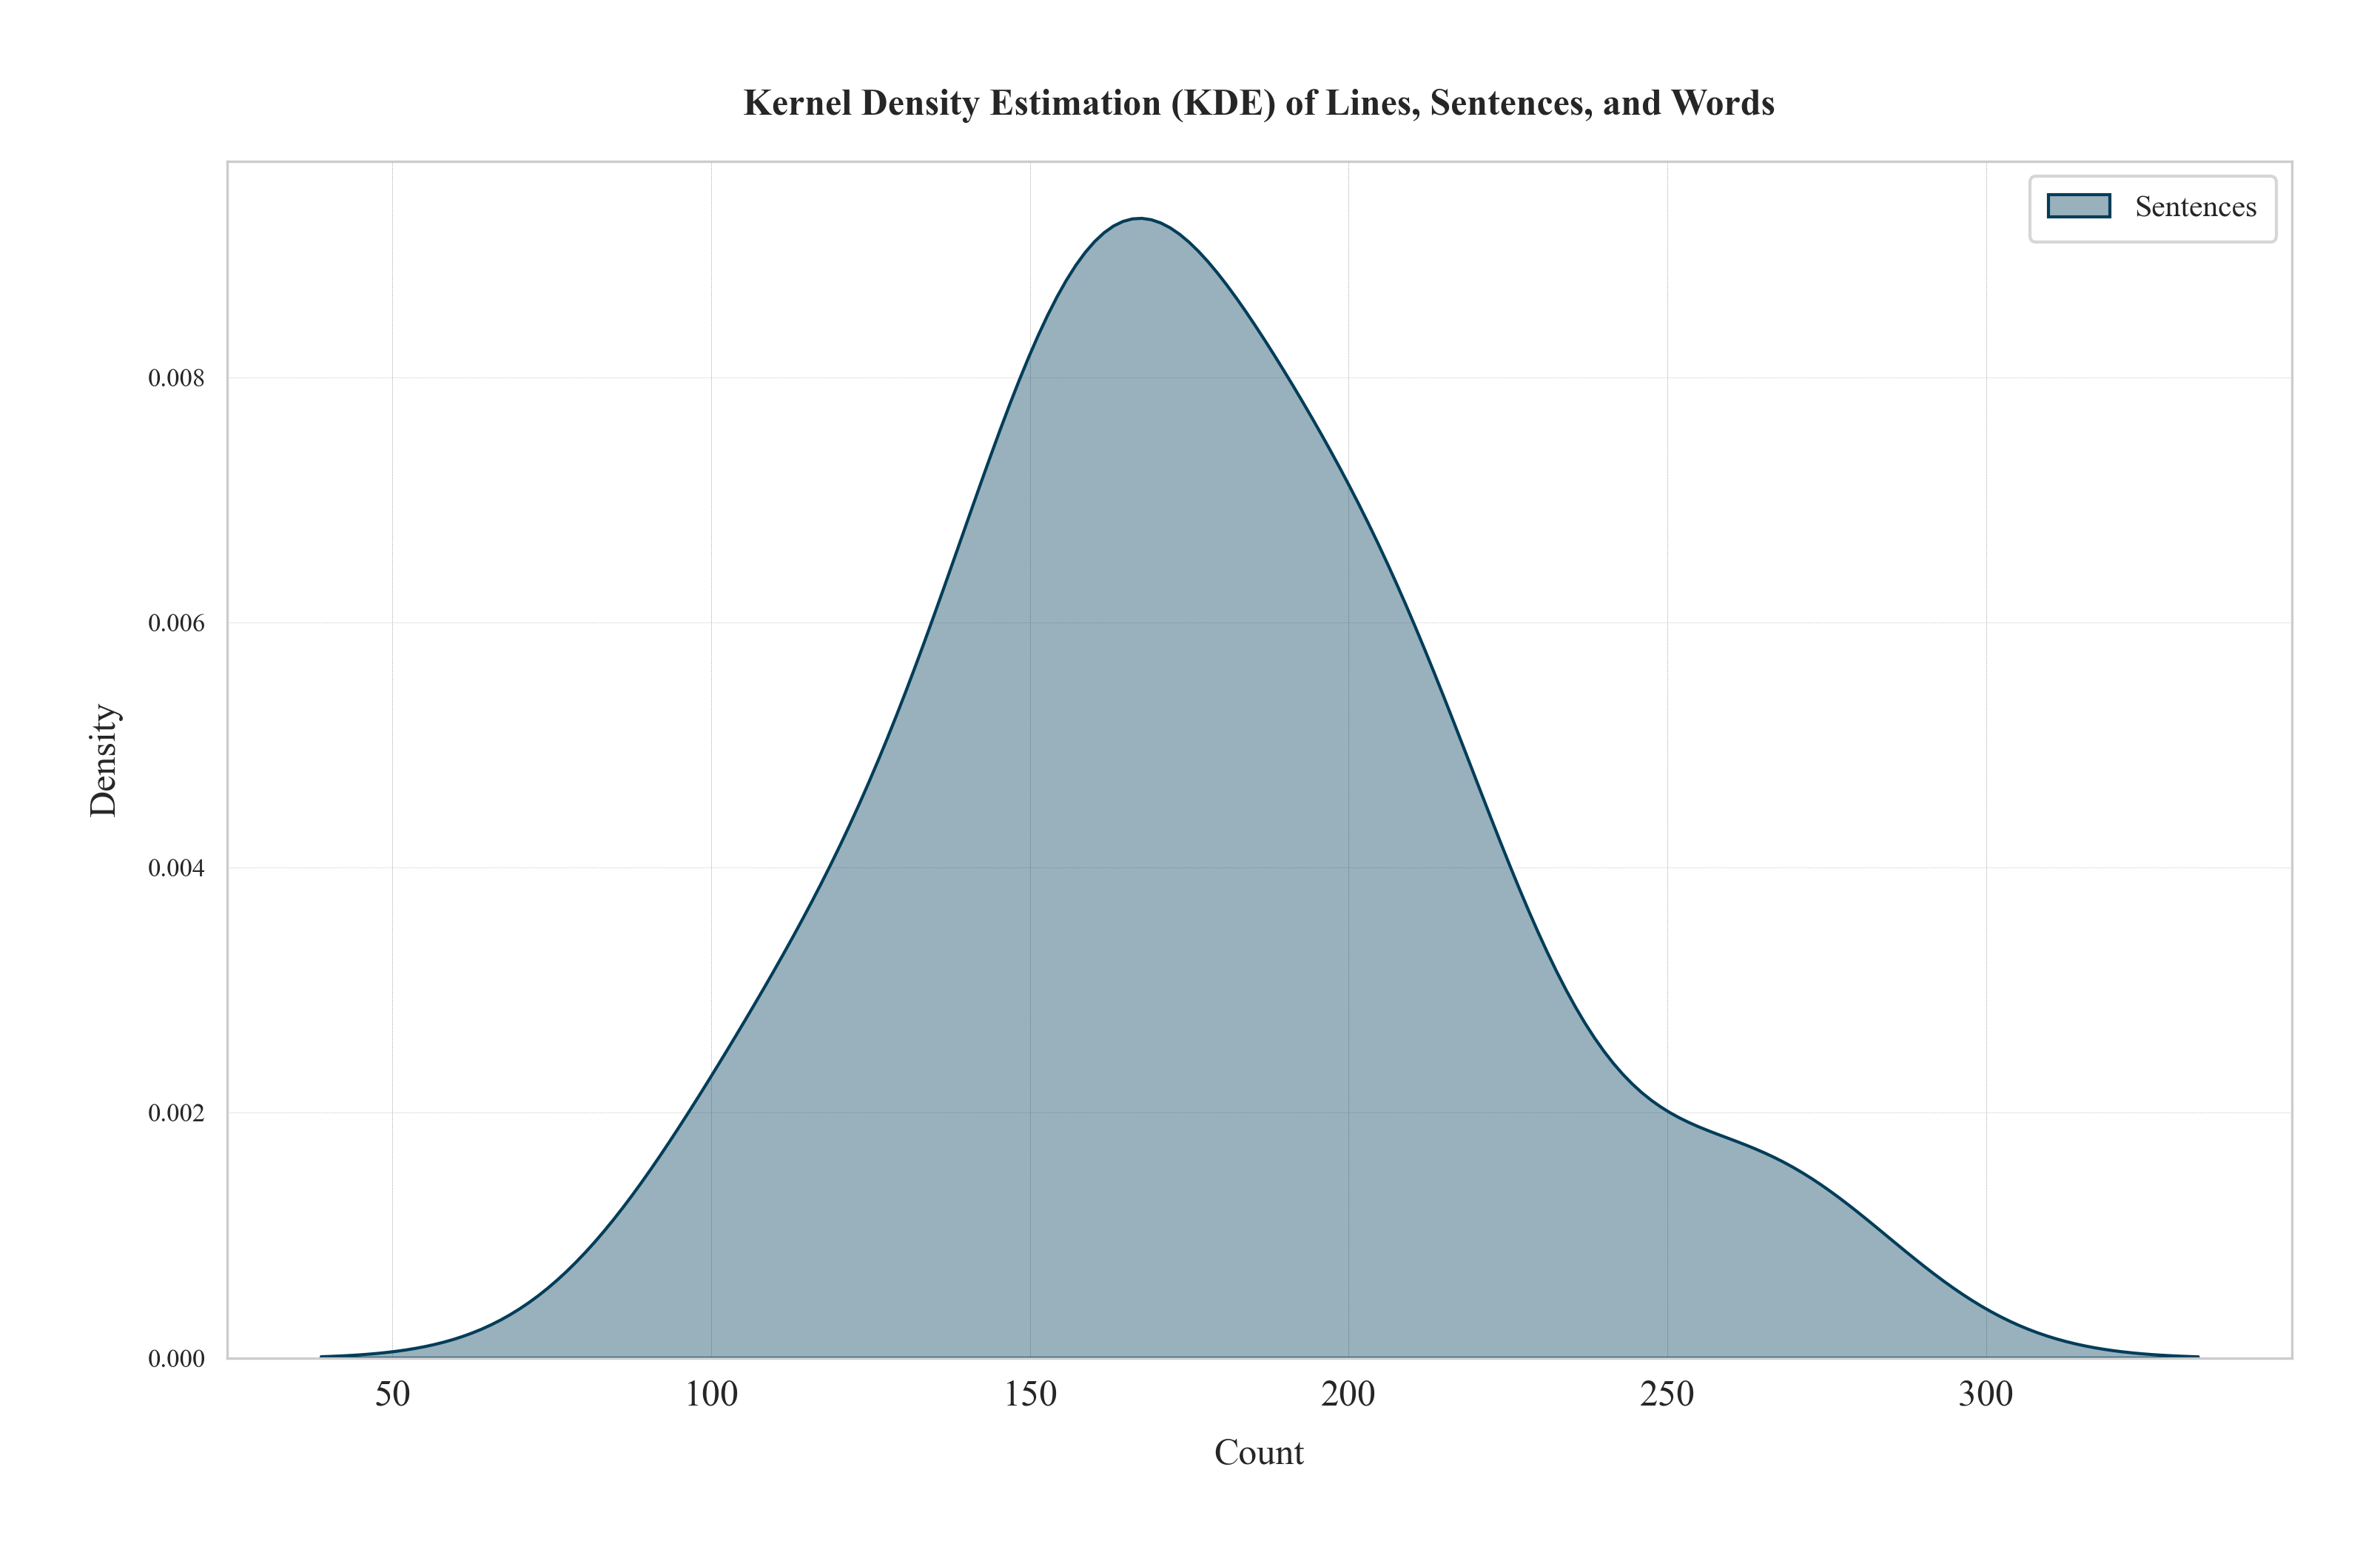

In [14]:
# Words KDE plot

sns.kdeplot(df['num_sentences'], label="Sentences", fill=True, alpha=0.4)

plt.xlabel("Count")
plt.ylabel("Density")
plt.title("Kernel Density Estimation (KDE) of Lines, Sentences, and Words")
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.show()